Sidharth Dhawan | 102218069 | BS3

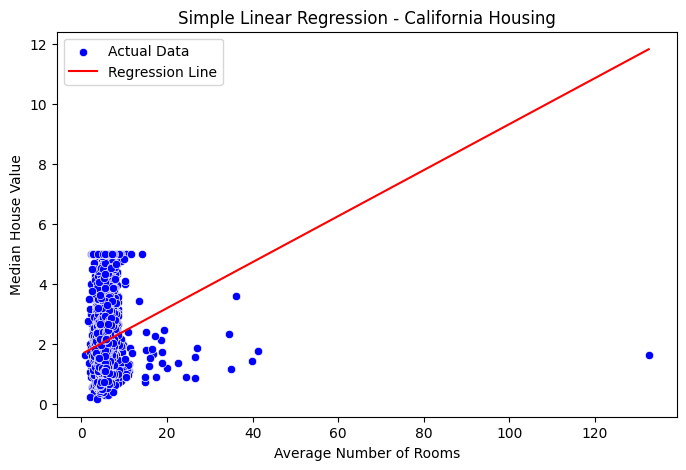

In [15]:
# USING INBUILT 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)


df['MedHouseVal'] = california.target


X = df[['AveRooms']]  
y = df['MedHouseVal']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)




plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test['AveRooms'], y=y_test, label='Actual Data', color='blue')
sns.lineplot(x=X_test['AveRooms'], y=y_pred, label='Regression Line', color='red')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value')
plt.title('Simple Linear Regression - California Housing')
plt.legend()
plt.show()


Slope (m): 0.07675558963126741
Intercept (c): 1.6547622685968417


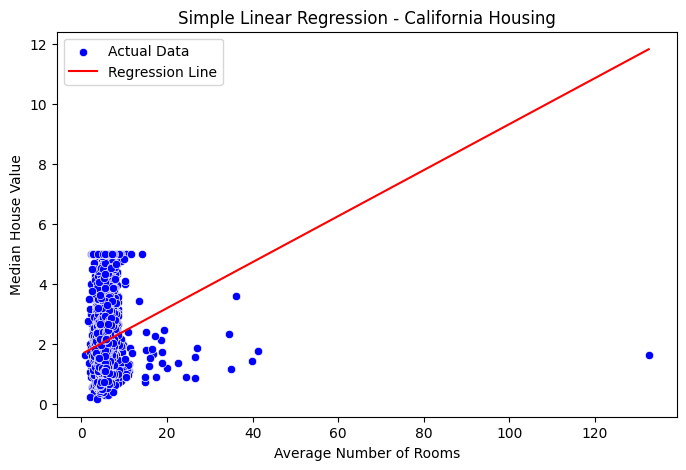

In [1]:
# FROM SCRATCH

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing


california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target


X = df['AveRooms']
y = df['MedHouseVal']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_mean = X_train.mean()
y_mean = y_train.mean()

numerator = ((X_train - x_mean) * (y_train - y_mean)).sum()
denominator = ((X_train - x_mean) ** 2).sum()
m = numerator / denominator

c = y_mean - m * x_mean

print(f"Slope (m): {m}")
print(f"Intercept (c): {c}")


y_pred = m * X_test + c


plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test, y=y_test, label='Actual Data', color='blue')
sns.lineplot(x=X_test, y=y_pred, label='Regression Line', color='red')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value')
plt.title('Simple Linear Regression - California Housing')
plt.legend()
plt.show()


1. K Fold Cross Validation

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('USA_Housing.csv')

print(df.head())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  
0                          4.09      23086.80050  1.059034e+06  
1                          3.09      40173.07217  1.505891e+06  
2                          5.13      36882.15940  1.058988e+06  
3                          3.26      34310.24283  1.260617e+06  
4                          4.23      26354.10947  6.309435e+05  


In [4]:
X = df.drop(columns=['Price'])
y = df['Price']

In [5]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [6]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_r2 = -np.inf
best_beta = None


for train_index, test_index in kf.split(X_scaled):
    
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    
    X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]  
    beta = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train
    
    X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]  
    y_pred = X_test_bias @ beta
    
    r2 = r2_score(y_test, y_pred)
    print(f'R^2 Score: {r2}')
    
 
    if r2 > best_r2:
        best_r2 = r2
        best_beta = beta


R^2 Score: 0.9179971706985147
R^2 Score: 0.9145677884802819
R^2 Score: 0.9116116385364478
R^2 Score: 0.9193091764960816
R^2 Score: 0.9243869413350316


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]  
beta_final = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train

X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test] 
y_pred = X_test_bias @ beta_final

final_r2 = r2_score(y_test, y_pred)
print(f'Final R^2 Score on Test Data: {final_r2}')


Final R^2 Score on Test Data: 0.9146818498916266


2. Gradient Descent

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


df = pd.read_csv('USA_Housing.csv')

X = df.drop(columns=['Price']).values

y = df['Price'].values.reshape(-1, 1)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

train_size = int(0.56 * len(X_scaled))
val_size = int(0.14 * len(X_scaled))


X_train, X_val, X_test = X_scaled[:train_size], X_scaled[train_size:train_size + val_size], X_scaled[train_size + val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]


def gradient_descent(X, y, lr, iterations):
    m, n = X.shape
    beta = np.zeros((n, 1))
    for _ in range(iterations):
        y_pred = X @ beta
        gradient = (X.T @ (y_pred - y)) / m
        beta -= lr * gradient
    return beta



learning_rates = [0.001, 0.01, 0.1, 1]
best_beta = None
best_r2_val = -np.inf

for lr in learning_rates:
    beta = gradient_descent(X_train, y_train, lr, 1000)
    
    y_pred_val = X_val @ beta
    r2_val = r2_score(y_val, y_pred_val)
    y_pred_test = X_test @ beta
    r2_test = r2_score(y_test, y_pred_test)
    
    print(f"\nLearning Rate: {lr}")
    print(f"Validation R² Score: {r2_val}")
    print(f"Test R² Score: {r2_test}")
    if r2_val > best_r2_val:
        best_r2_val = r2_val
        best_beta = beta
        
print("\nBest Regression Coefficients (β) Matrix:")
print(best_beta.flatten()[:5], "...")


Learning Rate: 0.001
Validation R² Score: -11.662353598784508
Test R² Score: -11.331506232698445

Learning Rate: 0.01
Validation R² Score: -11.449139911240986
Test R² Score: -11.287444144256632

Learning Rate: 0.1
Validation R² Score: -11.449120629902739
Test R² Score: -11.287738446033547

Learning Rate: 1
Validation R² Score: -11.449120629902739
Test R² Score: -11.287738446033547

Best Regression Coefficients (β) Matrix:
[240348.71879827 159974.20117522 134318.66411562  -9694.98997624
 148150.30037803] ...


3. Preprocessing and Multiple Linear Regression

In [9]:
import pandas as pd
file_path = 'carPrediction.csv'
columns = [
    "symboling", "normalized_losses", "make", "fuel_type", "aspiration", "num_doors",
    "body_style", "drive_wheels", "engine_location", "wheel_base", "length", "width", "height",
    "curb_weight", "engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke",
    "compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"
]

df = pd.read_csv(file_path, names=columns)
df.replace('?', pd.NA, inplace=True)
print(df.head())

   symboling normalized_losses         make fuel_type aspiration num_doors  \
0          3              <NA>  alfa-romero       gas        std       two   
1          3              <NA>  alfa-romero       gas        std       two   
2          1              <NA>  alfa-romero       gas        std       two   
3          2               164         audi       gas        std      four   
4          2               164         audi       gas        std      four   

    body_style drive_wheels engine_location  wheel_base  ...  engine_size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel_system  bore  stroke compression_ratio horsepower  peak_rpm 

In [10]:

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))
df.dropna(subset=['price'], inplace=True)
print(df.head())

   symboling normalized_losses         make fuel_type aspiration num_doors  \
0          3               161  alfa-romero       gas        std       two   
1          3               161  alfa-romero       gas        std       two   
2          1               161  alfa-romero       gas        std       two   
3          2               164         audi       gas        std      four   
4          2               164         audi       gas        std      four   

    body_style drive_wheels engine_location  wheel_base  ...  engine_size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel_system  bore  stroke compression_ratio horsepower  peak_rpm 

In [11]:

from sklearn.preprocessing import LabelEncoder
def word_to_num(word):
    word_map = {
        'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,
        'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10
    }
    return word_map.get(word, word)

df['num_doors'] = df['num_doors'].apply(lambda x: word_to_num(str(x).lower()) if isinstance(x, str) else x)
df['num_cylinders'] = df['num_cylinders'].apply(lambda x: word_to_num(str(x).lower()) if isinstance(x, str) else x)

df = pd.get_dummies(df, columns=['body_style', 'drive_wheels'], drop_first=True)

label_encoder = LabelEncoder()
df['make'] = label_encoder.fit_transform(df['make'])
df['aspiration'] = label_encoder.fit_transform(df['aspiration'])
df['engine_location'] = label_encoder.fit_transform(df['engine_location'])
df['fuel_type'] = label_encoder.fit_transform(df['fuel_type'])

df['fuel_system'] = df['fuel_system'].apply(lambda x: 1 if 'pfi' in str(x).lower() else 0)

df['engine_type'] = df['engine_type'].apply(lambda x: 1 if 'ohc' in str(x).lower() else 0)
print(df.head())

   symboling normalized_losses  make  fuel_type  aspiration  num_doors  \
0          3               161     0          1           0          2   
1          3               161     0          1           0          2   
2          1               161     0          1           0          2   
3          2               164     1          1           0          4   
4          2               164     1          1           0          4   

   engine_location  wheel_base  length  width  ...  peak_rpm  city_mpg  \
0                0        88.6   168.8   64.1  ...      5000        21   
1                0        88.6   168.8   64.1  ...      5000        21   
2                0        94.5   171.2   65.5  ...      5000        19   
3                0        99.8   176.6   66.2  ...      5500        24   
4                0        99.4   176.6   66.4  ...      5500        18   

   highway_mpg  price  body_style_hardtop  body_style_hatchback  \
0           27  13495               False  

In [12]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['price'])
y = df['price'].astype(float)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna()
y = y.loc[X.index]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled.head())

   symboling  normalized_losses      make  fuel_type  aspiration  num_doors  \
0   1.737851           0.889130 -1.950853    0.32969   -0.470698  -1.148121   
1   1.737851           0.889130 -1.950853    0.32969   -0.470698  -1.148121   
2   0.130043           0.889130 -1.950853    0.32969   -0.470698  -1.148121   
3   0.933947           0.974206 -1.791216    0.32969   -0.470698   0.870988   
4   0.933947           0.974206 -1.791216    0.32969   -0.470698   0.870988   

   engine_location  wheel_base    length     width  ...  horsepower  peak_rpm  \
0        -0.122169   -1.685207 -0.420592 -0.841978  ...    0.206643 -0.271067   
1        -0.122169   -1.685207 -0.420592 -0.841978  ...    0.206643 -0.271067   
2        -0.122169   -0.704729 -0.225072 -0.181531  ...    1.335332 -0.271067   
3        -0.122169    0.176040  0.214849  0.148693  ...   -0.029594  0.774259   
4        -0.122169    0.109567  0.214849  0.243043  ...    0.311637  0.774259   

   city_mpg  highway_mpg  body_style_h

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R2 Score on Test Set: {r2:.4f}")

R2 Score on Test Set: 0.7349


In [14]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train_pca)

y_pred_pca = model_pca.predict(X_test_pca)
r2_pca = r2_score(y_test_pca, y_pred_pca)

print(f"R2 Score after PCA on Test Set: {r2_pca:.4f}")

R2 Score after PCA on Test Set: 0.7349
